Text(0.5, 1.0, 'Data set')

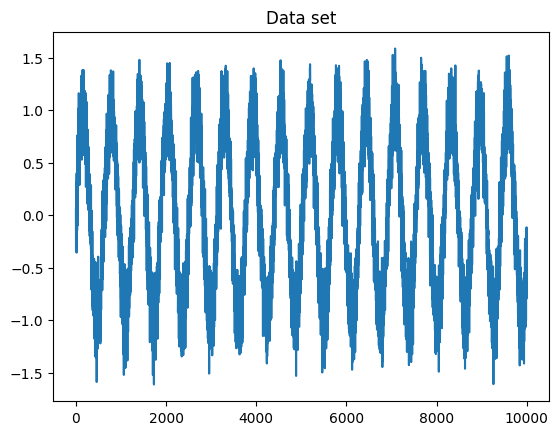

In [1]:
from lbm.datasets.noisy_sine import Prepocessor
from matplotlib import pyplot as plt

processor = Prepocessor()

plt.plot(processor.dataset.x.numpy(), processor.dataset.y.numpy())
plt.title('Data set')

In [2]:
from lbm.models import Forecaster
from lbm.workflow import train_and_validate
from torch.optim import Adam
from torch.nn import MSELoss
import numpy as np


def validate_model(lookback, hidden_size, num_layers, batch_size, epochs):
    processor = Prepocessor(lookback=lookback)
    train_loader, val_loader, test_loader = processor.get_loaders(
        batch_size=batch_size
    )

    model = Forecaster(1, hidden_size, num_layers)

    optimizer = Adam(model.parameters())
    loss_fn = MSELoss()
    train_losses, val_losses = train_and_validate(model, train_loader, 
                                                  val_loader, optimizer, 
                                                  loss_fn, epochs=epochs)
    plt.plot(np.arange(1, len(train_losses) + 1), train_losses, 
             label='Training', color='blue')
    plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation',
             color='orange')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    t = np.arange(0, len(test_loader.dataset))
    predicted = []
    actual = []
    for i, (x, y) in enumerate(test_loader):
        y_pred = model(x)
        predicted.append(y_pred.detach().numpy())
        actual.append(y.detach().numpy())
    predicted = np.concatenate(predicted)
    actual = np.concatenate(actual)
    plt.plot(t, predicted, label='Predicted', color='green')
    plt.plot(t, actual, label='Actual', color='purple')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Predicted vs Actual')
    plt.show()


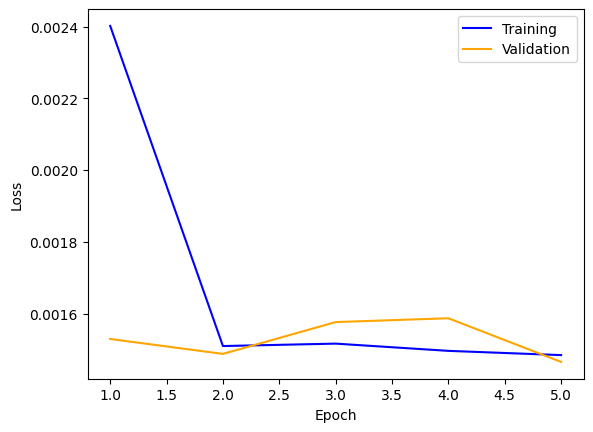

IndexError: index 10000 is out of bounds for dimension 0 with size 10000

In [3]:
validate_model(30, 20, 4, 64, 5)